In [1]:
from jedi import jedi

import matplotlib.pylab as plt
import numpy as np
from __future__ import division
from scipy.integrate import odeint,ode
from numpy import zeros,ones,eye,tanh,dot,outer,sqrt,linspace,cos,pi,hstack,zeros_like,abs,repeat
from numpy.random import uniform,normal,choice
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Simulation Parameters

In [2]:
# target pattern
target = lambda t0: cos(2 * pi * t0 / 50)

# Mass model
# Note: tanh_x must be passed be last so that it
# can be updated locally.
def model(t0, x, tanh_x): 
    return -x + g * dot(J, tanh_x) + dot(w, tanh_x) * u

dt = 1       # time step
tmax = 800   # simulation length
tstop = 300

N = 300
J = normal(0, sqrt(1 / N), (N, N))
x0 = uniform(-0.5, 0.5, N)
t = linspace(0, 50, 500)

g = 1.5
u = uniform(-1, 1, N)
w = uniform(-1 / sqrt(N), 1 / sqrt(N), N)  # Initial weights
lr = 1.0  # Learning rate

In [3]:
def error_signal_plot(t, z, wu):
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(t, target(t), '-r', lw=2)
    plt.plot(t, z, '-b')
    plt.legend(('target', 'output'))
    plt.ylim([-1.1, 3])
    plt.xticks([])
    plt.subplot(2, 1, 2)
    plt.plot(t, wu, '-k')
    plt.yscale('log')
    plt.ylabel('$|\Delta w|$', fontsize=20)
    plt.xlabel('time', fontweight='bold', fontsize=16)
    plt.show()

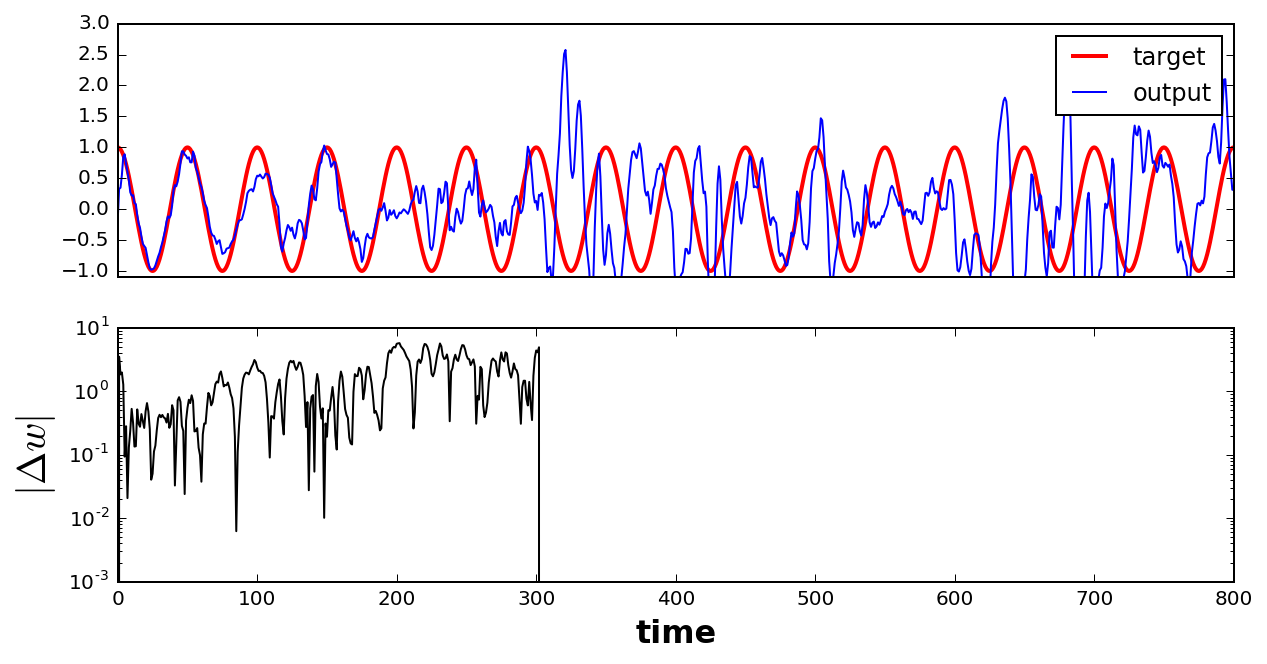

In [4]:
X = jedi.force(target, model, lr, dt, tmax, tstop, x0, w)
error_signal_plot(X.t, X.z, X.wu)

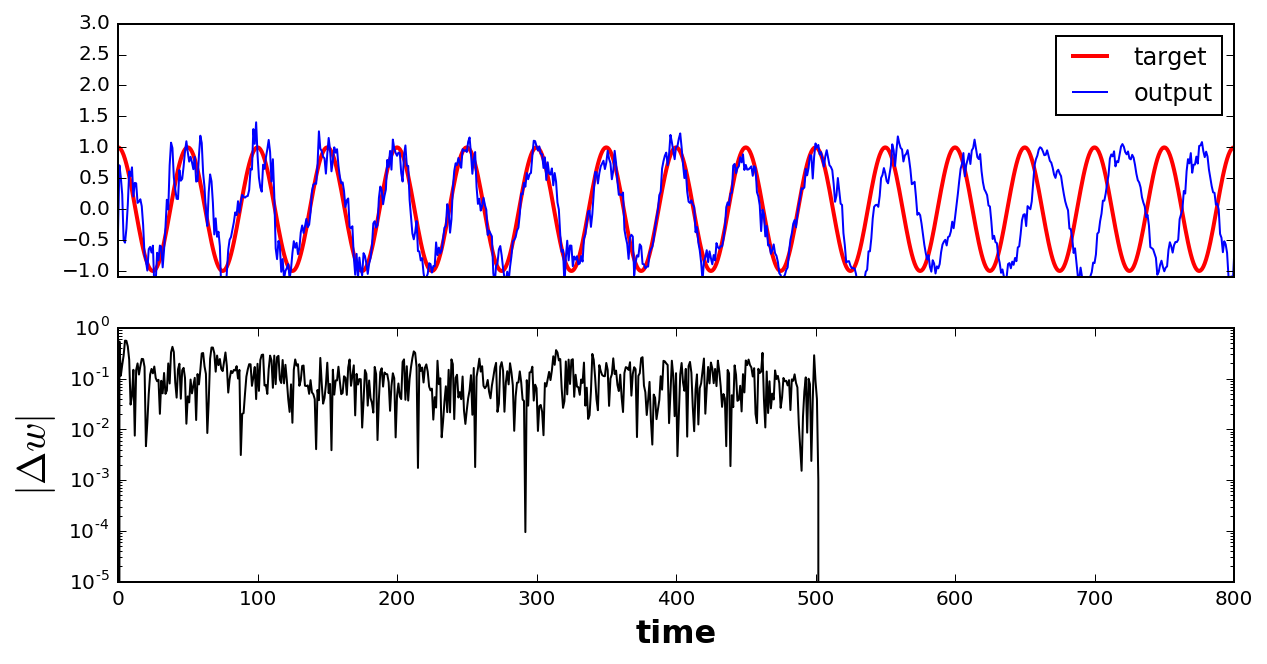

In [5]:
X = jedi.dforce()
error_signal_plot(X.t, X.z, X.wu)

# TODO

* Parameterize the functions and doc parameters
* Resolve f3() tanh dependency